# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Skillfactory---Практический-Machine-Learning" data-toc-modified-id="Skillfactory---Практический-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Skillfactory - Практический Machine Learning</a></div><div class="lev2 toc-item"><a href="#19/02/2018---Аномалии,-работа-с-признаками,-пайплайны-(практика)" data-toc-modified-id="19/02/2018---Аномалии,-работа-с-признаками,-пайплайны-(практика)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>19/02/2018 - Аномалии, работа с признаками, пайплайны (практика)</a></div><div class="lev1 toc-item"><a href="#Создание-пайплайна-и-генерация-признаков" data-toc-modified-id="Создание-пайплайна-и-генерация-признаков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Создание пайплайна и генерация признаков</a></div><div class="lev2 toc-item"><a href="#Посмотрим-на-данные" data-toc-modified-id="Посмотрим-на-данные-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим на данные</a></div><div class="lev2 toc-item"><a href="#Генерим-признаки" data-toc-modified-id="Генерим-признаки-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Генерим признаки</a></div><div class="lev2 toc-item"><a href="#Подбор-гипер-параметров" data-toc-modified-id="Подбор-гипер-параметров-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подбор гипер-параметров</a></div><div class="lev3 toc-item"><a href="#Pipeline" data-toc-modified-id="Pipeline-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Pipeline</a></div><div class="lev3 toc-item"><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Подбор гиперпараметров</a></div><div class="lev4 toc-item"><a href="#Grid-search" data-toc-modified-id="Grid-search-2321"><span class="toc-item-num">2.3.2.1&nbsp;&nbsp;</span>Grid search</a></div><div class="lev4 toc-item"><a href="#Random-Search" data-toc-modified-id="Random-Search-2322"><span class="toc-item-num">2.3.2.2&nbsp;&nbsp;</span>Random Search</a></div><div class="lev3 toc-item"><a href="#HyperOpt" data-toc-modified-id="HyperOpt-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>HyperOpt</a></div><div class="lev2 toc-item"><a href="#Ваш-черед" data-toc-modified-id="Ваш-черед-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Ваш черед</a></div><div class="lev3 toc-item"><a href="#Новые-признаки" data-toc-modified-id="Новые-признаки-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Новые признаки</a></div><div class="lev2 toc-item"><a href="#Поиск-гиперпараметров" data-toc-modified-id="Поиск-гиперпараметров-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Поиск гиперпараметров</a></div>

# Skillfactory - Практический Machine Learning
## 19/02/2018 - Аномалии, работа с признаками, пайплайны (практика)

<center> Шестаков Андрей </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Создание пайплайна и генерация признаков
<center>Шестаков Андрей</center>

В этом задании мы рассмотрим данные с предыдущего Sberbank Data Science Contest. К сожалению найти страницу с конкурсом уже не получается.

Одной из задач была опредление пола владельца карты по его транзакциям на карте. Зачем это нужно - одному сберу известно, но эта задача была хороша тем, что в ней можно нагенерировать много разных признаков

Есть такая [презентация](https://alexanderdyakonov.files.wordpress.com/2016/10/dj2016_sdsj_vis.pdf) с предварительным анализом данных и идеями про признаки

Нам понадобятся файлы `customers_gender_train.csv`, `transactions.tsv.gz`, `mcc_types.tsv` и `trans_types.tsv`.

## Посмотрим на данные

Это метки ответов

In [2]:
df_gender = pd.read_csv('data/customers_gender_train.csv')
df_gender.head()

,customer_id,gender
0,75562265,0
1,10928546,1
2,69348468,1
3,84816985,1
4,61009479,0


Это сами транзакции (отрицательные транзакции - списывание, положительные - зачисление на счет)

In [3]:
df_transactions = pd.read_csv('data/transactions.csv.gz')
df_transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN


Далее, расшифровки кодов [mcc](https://ru.wikipedia.org/wiki/Merchant_Category_Code) и транзакций

In [5]:
df_tr = pd.read_csv('data/tr_types.csv', sep=';')
df_tr.head()

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...


In [7]:
df_mcc = pd.read_csv('data/tr_mcc_codes.csv', sep=';')
df_mcc.head()

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


In [8]:
for i in range(len(df_mcc)):
    print(df_mcc.iloc[i].mcc_code, '\t', df_mcc.iloc[i].mcc_description, '\n\n')

742 	 Ветеринарные услуги 


1711 	 Генеральные подрядчики по вентиляции, теплоснабжению, и водопроводу 


1731 	 Подрядчики по электричеству 


1799 	 Подрядчики, специализированная торговля — нигде более не классифицированные 


2741 	 Разнообразные издательства/печатное дело 


3000 	 Авиалинии, авиакомпании 


3351 	 Агентства по аренде автомобилей 


3501 	 Жилье — отели, мотели, курорты 


4111 	 Транспортировка — пригородные и локальные сезонные транспортные средства, включая электрички 


4112 	 Пассажирские железные перевозки 


4121 	 Лимузины и такси 


4131 	 Автобусные линии 


4214 	 Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка 


4215 	 Услуги курьера — по воздуху и на земле, агентство по отправке грузов 


4411 	 Круизные линии 


4511 	 Авиалинии, авиакомпании, нигде более не классифицированные 


4722 	 Туристические агентства и организаторы экскурсий 


4784 	 Дорожный и мостовой сборы,

Первое что мы видем - это странная дата и суммы в транзакциях. 

В принципе, посмотрев на исходное распределение "относительных" дат по какой-нибудь гендерной группы mcc, становится примерно понятно, что за даты закодированы.

Ну а суммы транзакций организаторы просто умножили на $\pi^{\exp}$ =)

Преобразование будет проделано ниже, но при желании, можете сами со всем разобраться.

In [9]:
from pandas import Timestamp, DateOffset

In [10]:
def preproc_transactions(df_transactions):
    sec_per_day = 86400
    sec_per_hour = 3600
    
    start_date = 1420070400 - 154 * sec_per_day - 3 * sec_per_hour
    
    df_transactions.loc[:, 'day'] = df_transactions.tr_datetime\
                                               .str.split(' ')\
                                               .str.get(0)\
                                               .astype(int)
    df_transactions.loc[:, 'time_raw'] = df_transactions.tr_datetime\
                                                    .str.split(' ')\
                                                    .str.get(1)

    # set temp dt
    df_transactions.loc[:, 'dt_temp'] = pd.to_datetime(df_transactions.loc[:, 'time_raw'], 
                                                    format='%H:%M:%S')\
                                        + DateOffset(years=115)
    
    df_transactions = df_transactions.assign(dt = lambda x: x.dt_temp.astype(np.int64) // 10**9
                                             + (x.day - 153) * sec_per_day)\
                                     .assign(weekday = lambda x: ((x.day + 4) % 7 + 1))
        
    df_transactions.loc[:, 'datetime'] = pd.to_datetime(df_transactions.dt, unit='s')
    df_transactions.loc[:, 'date'] = df_transactions.loc[:, 'datetime'].dt.strftime('%Y-%m-%d')
    df_transactions.loc[:, 'hour'] = df_transactions.loc[:, 'datetime'].dt.strftime('%H')
    
    df_transactions = df_transactions.drop(['dt_temp', 'time_raw', 'tr_datetime'], axis=1)
    
    df_transactions.loc[:, 'amount'] = np.round(df_transactions.loc[:, 'amount']/(np.pi**np.exp(1)))
            
    return df_transactions

In [11]:
df_transactions = df_transactions.pipe(preproc_transactions)

In [12]:
df_transactions.head()

,customer_id,mcc_code,tr_type,amount,term_id,day,dt,weekday,datetime,date,hour
0,39026145,4814,1030,-100.0,NaN,0,1406888606,5,2014-08-01 10:23:26,2014-08-01,10
1,39026145,6011,7010,2500.0,NaN,1,1406974769,6,2014-08-02 10:19:29,2014-08-02,10
2,39026145,4829,2330,-2500.0,NaN,1,1406974856,6,2014-08-02 10:20:56,2014-08-02,10
3,39026145,5499,1010,-62.0,NaN,1,1406975994,6,2014-08-02 10:39:54,2014-08-02,10
4,39026145,5499,1010,-41.0,NaN,2,1407080022,7,2014-08-03 15:33:42,2014-08-03,15


In [13]:
len(set(df_transactions.customer_id))

15000

## Генерим признаки

В качестве базовых признаков, можно взять, например, 
* количество (доля) транзакций по каждому mcc_code
* количество (доля) транзакций в разные промежутки времени

In [14]:
def gen_features(df_gender, df_transactions):
    
    df_mcc_counts = \
        df_transactions.pivot_table(index=['customer_id'], columns='mcc_code', values='amount', 
                             aggfunc=np.size, fill_value=0)

#    df_mcc_counts = df_mcc_counts.rename_axis(lambda x: 'mcc_{}_count'.format(x), axis=1)
    df_mcc_counts = df_mcc_counts.rename(lambda x: 'mcc_{}_count'.format(x), axis=1)

    df_hour_rations = \
        df_transactions.pivot_table(index=['customer_id'], columns='hour', values='amount', 
                             aggfunc=np.size, fill_value=0)

    # Сложная и нетривиальная конструкция
    total = df_hour_rations.sum(axis=1)
#    df_hour_rations.loc[:, 'morning'] = (df_hour_counts.loc[:, '05':'11'].sum(axis=1).T/total).T
#    df_hour_rations.loc[:, 'day'] = (df_hour_counts.loc[:, '12':'17'].sum(axis=1).T/total).T
#    df_hour_rations.loc[:, 'evening'] = (df_hour_counts.loc[:, '18':'23'].sum(axis=1).T/total).T
#    df_hour_rations.loc[:, 'night'] = (df_hour_counts.loc[:, '00':'04'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'morning'] = (df_hour_rations.loc[:, '05':'11'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'day'] = (df_hour_rations.loc[:, '12':'17'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'evening'] = (df_hour_rations.loc[:, '18':'23'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'night'] = (df_hour_rations.loc[:, '00':'04'].sum(axis=1).T/total).T


    # Объединяем:
    df_features = df_gender.join(df_mcc_counts, on='customer_id', how='left')\
                           .join(df_hour_rations.loc[:, ['morning', 'day', 'evening', 'night']], on='customer_id', how='left')
        
    return df_features

In [25]:
df_features = df_gender.pipe(gen_features, df_transactions)

In [12]:
df_features.head()

,customer_id,gender,mcc_742_count,mcc_1711_count,mcc_1731_count,mcc_1799_count,mcc_2741_count,mcc_3000_count,mcc_3351_count,mcc_3501_count,...,mcc_8999_count,mcc_9211_count,mcc_9222_count,mcc_9311_count,mcc_9399_count,mcc_9402_count,morning,day,evening,night
0,75562265,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.262658,0.329114,0.325949,0.082278
1,10928546,1,0,0,0,0,0,0,0,0,...,1,0,0,0,2,0,0.352697,0.413555,0.042877,0.190871
2,69348468,1,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0.296804,0.493151,0.196347,0.013699
3,84816985,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.247423,0.494845,0.216495,0.041237
4,61009479,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.636943,0.239915,0.004246,0.118896


In [26]:
label = 'gender'
idx_features = df_features.columns != label

In [27]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

## Подбор гипер-параметров

### Pipeline

Сделаем простой sklearn пайплайн, который делает следующее:
* Нормирует признаки через StandartScaler
* Запускает лог-регрессию

In [28]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression

In [29]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

In [30]:
RND_SEED = 123

### Подбор гиперпараметров

До этого мы исключительно смотрели, как влияет на меру качества какой-то один параметр при фиксированных остальных. Пришло время перебирать все что можно!

В базовом варианте, это делается либо через `Grid Search`, либо через `Random Search`. Какие ключевые отличия?
* В `Grid Search` вы в явном виде задаете возможные значения каждого гипер-параметра, который хотите варьировать. Соответственно, выполняется **полный** перебор всех возможных комбинаций
* В `Random Search` допукается указание распределения параметров, например "равномерно, на интервале от 0 до 100" или "нормальное распределение с таким-то цетром и такой-то дисперсией. Соответственно, так как это случайный перебор, то **вы** просто **задаете** количество случайных комбинаций, которые будут проверяться

Может показаться, что делать случайный перебор опасно - там же все случайно. Но на практике именно он и искользуется в силу двух причин
* Полный перебор большого количества комбинаций очень долгий
* Мы можем просто пропустить значения гиперпараметра, которые сильно влияют на метрику качества (см рисунок снизу)

<img src='img/gridsearch.jpeg'>

Попробуем оба варианта

#### Grid search

In [31]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold


In [19]:
# Задаем значения параметров, которые хотим проверить

# в данном случае "__" разделяет название гиперпараметра от этапа, где этот гиперпараметр используется
# если у нас будет не пайплайн, а просто один классификатор, то разделитель указывать не нужно
param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l1', 'l2'],
    'clf__random_state': [RND_SEED],
    'clf__C': np.logspace(-5, 3, 10)
}

print(param_grid)

{'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03])}


In [32]:
# Задаем схему кросс-валидации
cv = StratifiedKFold(n_splits=5, random_state=RND_SEED, shuffle=True)

In [21]:
grid_searcher = GridSearchCV(model, param_grid, 
                             scoring='roc_auc', 
                             n_jobs=-1, cv=cv, 
                             verbose=2, return_train_score='True')

grid_searcher.fit(X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   55.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': array([1.00000e-05, 7.74264e-05, 5.99484e-04, 4.64159e-03, 3.59381e-02,
       2.78256e-01, 2.15443e+00, 1.66810e+01, 1.29155e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='True',
       scoring='roc_auc', verbose=2)

На выходе в grid_searcher можно посмотреть, какая комбинация оказалась наилучшей, сколько занял рачет и напрямую достать лучшую модель.

In [22]:
grid_searcher.best_params_

{'clf__C': 0.03593813663804626,
 'clf__penalty': 'l1',
 'clf__random_state': 123,
 'scaler__with_mean': True}

In [23]:
grid_searcher.best_score_

0.8333672337310287

In [24]:
results = pd.DataFrame(grid_searcher.cv_results_)

In [25]:
results.sort_values(by=['rank_test_score']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__penalty,param_clf__random_state,param_scaler__with_mean,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
17,0.941280,0.020523,0.014557,0.001496,0.0359381,l1,123,True,"{'clf__C': 0.03593813663804626, 'clf__penalty'...",0.829862,...,0.833367,0.003550,1,0.844731,0.845469,0.844495,0.846011,0.843975,0.844936,0.000721
16,0.279848,0.010260,0.017953,0.007108,0.0359381,l1,123,False,"{'clf__C': 0.03593813663804626, 'clf__penalty'...",0.829917,...,0.833354,0.003544,2,0.844704,0.845460,0.844498,0.845977,0.843933,0.844914,0.000722
20,0.286101,0.010897,0.014010,0.002308,0.278256,l1,123,False,"{'clf__C': 0.2782559402207126, 'clf__penalty':...",0.830628,...,0.830993,0.003172,3,0.849431,0.850084,0.848813,0.850024,0.848216,0.849313,0.000717
21,4.534441,1.985556,0.013563,0.001017,0.278256,l1,123,True,"{'clf__C': 0.2782559402207126, 'clf__penalty':...",0.830656,...,0.830988,0.003172,4,0.849441,0.850087,0.848821,0.850024,0.848216,0.849318,0.000716
18,0.429050,0.010878,0.013767,0.001825,0.0359381,l2,123,False,"{'clf__C': 0.03593813663804626, 'clf__penalty'...",0.829426,...,0.830051,0.003366,5,0.848742,0.849500,0.848364,0.849393,0.847674,0.848735,0.000676


In [26]:
best_model = grid_searcher.best_estimator_

In [27]:
best_model

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=0.03593813663804626, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=123,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

#### Random Search

In [33]:
from scipy.stats import randint as sp_randint
from scipy.stats import lognorm as sp_lognorm

In [29]:
sp_lognorm(4).rvs()

32.58239915031147

In [30]:
# Задаем значения параметров, которые хотим проверить
# Теперь с распределениями
param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l1', 'l2'],
    'clf__random_state': [RND_SEED],
    'clf__C': sp_lognorm(4)
}

print(param_grid)

{'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000178A9A8B6D8>}


In [31]:
# Рассмотрим 20 случайных комбинаций
random_searcher = RandomizedSearchCV(model, param_grid, n_iter=20, 
                                     random_state=RND_SEED,
                                     scoring='roc_auc', 
                                     n_jobs=-1, cv=cv, 
                                     verbose=2, return_train_score='True')

random_searcher.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.9s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000178A9A8B6D8>},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='True', scoring='roc_auc', verbose=2)

Аналогичный выхлоп

In [32]:
random_searcher.best_params_

{'clf__C': 0.066168907176401,
 'clf__penalty': 'l1',
 'clf__random_state': 123,
 'scaler__with_mean': False}

In [33]:
random_searcher.best_score_

0.8331585112406745

In [34]:
results = pd.DataFrame(random_searcher.cv_results_)

In [35]:
results.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__penalty,param_clf__random_state,param_scaler__with_mean,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
6,0.289224,0.013689,0.023337,0.007969,0.0661689,l1,123,False,"{'clf__C': 0.066168907176401, 'clf__penalty': ...",0.830927,...,0.833159,0.003468,1,0.847303,0.848170,0.847123,0.848597,0.846272,0.847493,0.000817
12,0.261674,0.012981,0.014585,0.001889,0.023675,l1,123,False,"{'clf__C': 0.023675003937163, 'clf__penalty': ...",0.829737,...,0.833073,0.003692,2,0.841713,0.842133,0.841432,0.843049,0.841009,0.841867,0.000695
2,2.404101,0.167505,0.016357,0.003816,0.0988254,l1,123,True,"{'clf__C': 0.09882536189042468, 'clf__penalty'...",0.831300,...,0.832554,0.003362,3,0.848457,0.849135,0.847939,0.849446,0.847167,0.848429,0.000820
9,3.553185,0.204811,0.014162,0.001467,0.175976,l1,123,True,"{'clf__C': 0.17597644951448602, 'clf__penalty'...",0.831148,...,0.831639,0.003174,4,0.849178,0.849814,0.848512,0.849907,0.847940,0.849070,0.000755
19,0.601701,0.059017,0.014273,0.004994,0.499303,l1,123,True,"{'clf__C': 0.49930271136349663, 'clf__penalty'...",0.830203,...,0.830514,0.003240,5,0.849558,0.850320,0.849063,0.850109,0.848337,0.849478,0.000719


In [36]:
best_model = random_searcher.best_estimator_

In [37]:
best_model

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=False, with_std=True)), ('clf', LogisticRegression(C=0.066168907176401, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=123,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

### HyperOpt

Есть еще другой вариант - "умный" перебор параметров. И вот тут нам помогает библиотека `hyperopt`.

Если не вдаваться в детали, то `hyperopt` определяет следующего набора-кандидата с помощью некоторого алгоритма, который балансирует исследование еще не изведанных областей значений гиперпараметров и направления, вдоль которых наблюдались улучшения целевой метрики.

То есть мы задаем некоторую функцию, и ставим себе цель **минимизировать** (такова договоренность в `hyperopt`) ее значение исходя из параметров, которые она принимает.

Например, возьмем функцию $f(x) = \sin(x)/x$ и будем искать ее минимум при условии, что $x$ будет равномерно распределен на интервале $[-7.5, 7.5]$

In [38]:
# sudo pip install networkx==1.11

In [34]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, rand

In [35]:
trials = Trials()

In [41]:
best = fmin(
    fn=lambda x: -np.sin(x)/x,
    space=hp.uniform('x', -7.5, 7.5),
    algo=tpe.suggest,
    max_evals=100,
    trials=trials,

)

In [42]:
print(best)

{'x': -0.01729433597256569}


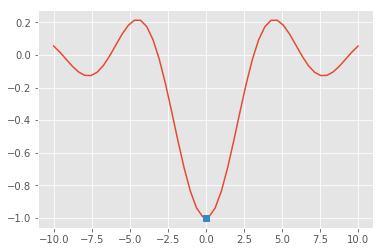

In [43]:
x = np.linspace(-10,10,50)
func = lambda x: -np.sin(x)/x
y = func(x)
plt.plot(x,y)

y_best = func(best['x'])
plt.plot(best['x'], y_best, marker='s')

Нашли)

Возвращаясь к нашим баранам, функция в данном случае будет возвращать метрику качества модели (пайплайна) на кроссвалидации. С помощью `hyperopt` мы будем искать минимум этой функции при заданных диапазонах значений гипер параметров.

Но самым важным плюсом, как по мне, является гибкость - в функцию, которую мы хотим минимизировать можно написать все что угодно. Например, сейчас я добавлю вариативность в пайплайне по типу шкалирования между - StandartScaler или RobustScaler.

In [36]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score

In [37]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

In [38]:
def run_trials_template(X, y, params, evals=100):

    def hyperopt_cv(X, y, params):
        
        X_ = X.copy()
        
        # Отделяем параметры лог регрессии в отдельный словарь
        lm_params = {}
        for k, v in params.items():
            if k.startswith('glob'):
                continue                
            elif k.startswith('lm'):
                lm_params[k.split('_', 1)[1]] = v
        
        # Задаем шкалирование
        if params['scaler_type'] == 'standart':
            scaler = StandardScaler(with_mean=params['scaler_centering'])
        else:
            assert params['scaler_type'] == 'robust'
            scaler = RobustScaler(with_centering=params['scaler_centering'])
        
        # Создаем лог рег с нужными параметрами
        clf = LogisticRegression(**lm_params)
        
        # Итоговый пайплайн
        model = Pipeline([
            ('scaler', scaler),
            ('clf', clf)
        ])

        # Схема кросс-валидации
        n_splits = 5
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, 
                             random_state=RND_SEED)
        scores = cross_val_score(model, X_, y,
                                 scoring='roc_auc', 
                                 cv=cv, 
                                 n_jobs=-1)

        # Возвращаем среднее значение метрики и отклонение (на всякий случай)
        return scores.mean(), scores.std()

    def f(params):
        acc, std = hyperopt_cv(X, y, params)
        return {'loss': -acc, 'qscore': -acc, 'qscore_std': std, 'status': STATUS_OK}

    trials = Trials()
    best = fmin(f, 
                params, 
                algo=tpe.suggest, 
                max_evals=evals, 
                trials=trials, 
                verbose=1)
    
    return(trials)

In [39]:
# Задаем пространство поиска
space4_lm = {
    'lm_penalty': hp.choice('penalty', ['l1', 'l2']),
    'lm_C': hp.loguniform('C', -5, 3),
    'lm_class_weight': hp.choice('class_weight', [None, 'balanced']),
    'lm_random_state': RND_SEED,
    'scaler_type': hp.choice('scaler_type', ['standart', 'robust']),
    'scaler_centering': hp.choice('scaler_centering', [False, True])
}

In [48]:
# Запускаем поиск
trials = run_trials_template(X, y, space4_lm, evals=40)

In [49]:
for t in trials:
    print(t)
    break

{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': -0.8322955114463813, 'qscore': -0.8322955114463813, 'qscore_std': 0.0022952706892577055, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'C': [0], 'class_weight': [0], 'penalty': [0], 'scaler_centering': [0], 'scaler_type': [0]}, 'vals': {'C': [0.13235791577637665], 'class_weight': [0], 'penalty': [1], 'scaler_centering': [1], 'scaler_type': [1]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2018, 8, 22, 11, 38, 53, 548000), 'refresh_time': datetime.datetime(2018, 8, 22, 11, 39, 0, 198000)}


In [50]:
def trials_df(trials):
    '''
    Функция форматирует результаты hyperopt в dataframe
    '''
    tr_dict = []
    for t in trials:
        trial = dict()
        for k, v in t['misc']['vals'].items():
            trial[k] = v[0]

        trial['qscore'] = -t['result']['qscore']
        trial['qscore_std'] = -t['result']['qscore_std']
        tr_dict.append(trial)

    df_res = pd.DataFrame.from_dict(tr_dict)
    df_res = df_res.sort_values('qscore', ascending=False)
    
    return df_res

Достаем результаты.

Стоит оговорится, что в некоторых столбцах указаны не фактические значение гиперпараметров, а их позиция в соответствуюем поле в `space4_lm`

In [51]:
df_trials = trials_df(trials)

Здесь `qscore` - метрика качества, а `scaler_type = 1` означает, что был выбран `scaler_type = robust`

In [52]:
df_trials.head()

,C,class_weight,penalty,qscore,qscore_std,scaler_centering,scaler_type
28,0.019833,0,0,0.836745,-0.003797,1,1
27,0.024203,1,0,0.836723,-0.003728,1,1
35,0.028722,1,0,0.836711,-0.003527,1,1
32,0.018688,0,0,0.836676,-0.003831,1,1
29,0.020799,1,0,0.836670,-0.003918,1,1


## Ваш черед

### Новые признаки

Задание творческое - придумайте по новому признаку (группе признаков)
* На основе mcc (tr_type)
* На основе временного фактора
* На основе текстов из описания mcc

Реализуйте их в функции, аналогичной `gen_features`.

Посмотрим долю разных типов транзакций

Посмотрим дни недели

Можно посмотреть используемые технологии. Например, «мобильной связи», «почтой», «АТМ», «POS», «Мобильный банк», «ВСП», «Сбербанк ОнЛ@йн», «УС», «Интернет», «Банкоматы»

In [59]:
df_transactions.head()

,customer_id,mcc_code,tr_type,amount,term_id,day,dt,weekday,datetime,date,hour
0,39026145,4814,1030,-100.0,NaN,0,1406888606,5,2014-08-01 10:23:26,2014-08-01,10
1,39026145,6011,7010,2500.0,NaN,1,1406974769,6,2014-08-02 10:19:29,2014-08-02,10
2,39026145,4829,2330,-2500.0,NaN,1,1406974856,6,2014-08-02 10:20:56,2014-08-02,10
3,39026145,5499,1010,-62.0,NaN,1,1406975994,6,2014-08-02 10:39:54,2014-08-02,10
4,39026145,5499,1010,-41.0,NaN,2,1407080022,7,2014-08-03 15:33:42,2014-08-03,15


## Просто из интереса посмотрим "интересные" типы mcc. В дальнейшем не используем, так как lr и сам их должен отлавливать.

5621 	 Готовая женская одежда 
5631 	 Аксессуары для женщин
5641 	 Детская одежда, включая одежду для самых маленьких 
5945 	 Магазины игрушек
5977 	 Магазины косметики
7230 	 Салоты красоты и парикмахерские
7995 	 Транзакции по азартным играм 

In [371]:
mcc_interest=[5621,5631,5641,5945,5977,7230,7995]
df_mcc_counts = \
    df_transactions.pivot_table(index=['customer_id'], columns='mcc_code', values='amount', 
                         aggfunc=np.size, fill_value=0)

In [372]:
df_mcc_counts=df_mcc_counts[[5621,5631,5641,5945,5977,7230,7995]]

In [373]:
df_mcc_counts = df_mcc_counts.rename(lambda x: 'mcc_{}'.format(x), axis=1)
df_features_2 = df_gender.join(df_mcc_counts, on='customer_id', how='left')

In [374]:
df_features_2[df_features_2.gender==0].sum()/df_features_2[df_features_2.gender==1].sum()/len(df_features_2[df_features_2.gender==0])*len(df_features_2[df_features_2.gender==1])

customer_id    1.004837
gender         0.000000
mcc_5621       3.626357
mcc_5631       3.506769
mcc_5641       1.234293
mcc_5945       1.221758
mcc_5977       2.948696
mcc_7230       2.076776
mcc_7995       0.123127
dtype: float64

Видим, что mcc 5621, 5631, 5977 и 7230 в 3 раза более популярны у женщин,чем у мужчин. А mcc 7995 - в 8 раз популярнее у мужчин.

## Добавим типы транзакций

In [40]:
def gen_features_2(df_gender, df_transactions):
    
    df_tr_type_counts = \
        df_transactions.pivot_table(index=['customer_id'], columns='tr_type', values='amount', 
                             aggfunc=np.size, fill_value=0)

    #возьмем ещё долю транзакций, чтобы сравнять активных и неактивных клиентов
    # !! По факту фича не улучшила результат, поэтому отказываемся....
#    df_tr_type_part = df_tr_type_counts.loc[:,[x for x in df_tr_type_counts.columns if x not in ['customer_id', 'gender']]].copy()
#    df_tr_type_part['total']=df_tr_type_part.sum(axis=1)
#    df_tr_type_part=df_tr_type_part.apply(lambda x: x/df_tr_type_part.loc[:,'total'])
#    df_tr_type_part=df_tr_type_part.drop('total', axis=1)
     
#    переименуем столбцы
    df_tr_type_counts = df_tr_type_counts.rename(lambda x: 'tr_type_{}_count'.format(x), axis=1)
#    df_tr_type_part = df_tr_type_part.rename(lambda x: 'tr_type_{}_part'.format(x), axis=1)
    
    
    # Объединяем:
    df_features_2 = df_gender.join(df_tr_type_counts, on='customer_id', how='left') #/
                            #.join(df_tr_type_part, on='customer_id', how='left') /
                           #.join(df_hour_rations.loc[:, ['morning', 'day', 'evening', 'night']], on='customer_id', how='left')
        
    return df_features_2

In [41]:
df_features_2=(gen_features_2(df_gender, df_transactions)).set_index('customer_id')

In [55]:
# Отдельно новые фичи показывают слабый результат. Но в совокупности с предыдущими, улучшают.
df_features_2=pd.concat([df_features_2, df_features.set_index('customer_id').loc[:,[x for x in df_features.columns if x not in ['customer_id', 'gender']]]], axis=1)

## Посмотрим типы коммуникаций

In [159]:
def gen_features_3(df_gender, df_transactions):
    tr_types=['мобильной связи', 'почтой', 'АТМ', 'POS', 'Мобильный банк', 'ВСП', u'Сбербанк ОнЛ@йн', 'Интернет', 'Банкоматы']
    tr_types=[x.lower() for x in tr_types]

    df_tt=df_tr.copy()

    for i in tr_types:
        df_tt[i] = df_tt.tr_description.map(lambda x: np.sign(x.lower().find(i)+1) )

    df_tt=df_tt[df_tt.iloc[:,2:].sum(axis=1)>0]

    df_tr_counts = \
        df_transactions.pivot_table(index=['customer_id'], columns='tr_type', values='amount', 
                                 aggfunc=np.size, fill_value=0)

    # df_tr_counts=df_tr_counts.loc[:,[x for x in (list(set(df_tt.tr_type.values)  & set(df_tr_counts.columns.values)))]]

    for i in tr_types:
        df_tr_counts[i]=0

    for tr_type in [x for x in (list(set(df_tt.tr_type.values)  & set(df_tr_counts.columns.values)))]:
        for tr_tech in tr_types:
            df_tr_counts.loc[:,tr_tech] = df_tr_counts.loc[:,tr_tech] + \
                df_tr_counts.loc[:, tr_type] * \
                    df_tt.loc[df_tt['tr_type']==tr_type,tr_tech].values[0]
    df_tr_counts = df_tr_counts[[x for x in tr_types]]
    return df_tr_counts.loc[df_gender.customer_id]

In [160]:
df_features_3=gen_features_3(df_gender, df_transactions)

In [161]:
df_features_3=pd.concat([df_features_3, df_features_2], axis=1)

## Добавим дни недели

In [163]:
def gen_features_4(df_gender, df_transactions):
    
    df_weekday=df_transactions[['customer_id','datetime']]
    df_weekday['weekday']=df_weekday.datetime.dt.weekday
    df_weekday_rations = \
        df_weekday.pivot_table(index=['customer_id'],# columns=[df_weekday.columns.values[3:]],
                            columns='weekday',
                               values='datetime', 
                             aggfunc=np.size, fill_value=0)
    df_weekday_rations=df_weekday_rations.loc[df_gender.customer_id]
        
    return df_weekday_rations

In [164]:
df_features_4=gen_features_4(df_gender, df_transactions)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [166]:
df_features_4=pd.concat([df_features_4, df_features_2], axis=1)

## Поиск гиперпараметров

Реализуйте функцию для hyperopt по перебору гиперпараметров вашего пайплайна

На всякий случай почитайте еще про [`FeatureUnion`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html) и [пример](http://scikit-learn.org/stable/auto_examples/hetero_feature_union.html#sphx-glr-auto-examples-hetero-feature-union-py)

## Подготавливаем нужные функции

In [57]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, rand

In [169]:
trials = Trials()

In [170]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score

In [171]:
def run_trials_template(X, y, params, evals=100):

    def hyperopt_cv(X, y, params):
        
        X_ = X.copy()
        
        # Отделяем параметры лог регрессии в отдельный словарь
        lm_params = {}
        for k, v in params.items():
            if k.startswith('glob'):
                continue                
            elif k.startswith('lm'):
                lm_params[k.split('_', 1)[1]] = v
        
        # Задаем шкалирование
        if params['scaler_type'] == 'standart':
            scaler = StandardScaler(with_mean=params['scaler_centering'])
        else:
            assert params['scaler_type'] == 'robust'
            scaler = RobustScaler(with_centering=params['scaler_centering'])
        
        # Создаем лог рег с нужными параметрами
        clf = LogisticRegression(**lm_params)
        
        # Итоговый пайплайн
        model = Pipeline([
            ('scaler', scaler),
            ('clf', clf)
        ])

        # Схема кросс-валидации
        n_splits = 5
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, 
                             random_state=RND_SEED)
        scores = cross_val_score(model, X_, y,
                                 scoring='roc_auc', 
                                 cv=cv, 
                                 n_jobs=-1)

        # Возвращаем среднее значение метрики и отклонение (на всякий случай)
        return scores.mean(), scores.std()

    def f(params):
        acc, std = hyperopt_cv(X, y, params)
        return {'loss': -acc, 'qscore': -acc, 'qscore_std': std, 'status': STATUS_OK}

    trials = Trials()
    best = fmin(f, 
                params, 
                algo=tpe.suggest, 
                max_evals=evals, 
                trials=trials, 
                verbose=1)
    
    return(trials)

In [172]:
# Задаем пространство поиска
space4_lm = {
    'lm_penalty': hp.choice('penalty', ['l1', 'l2']),
    'lm_C': hp.loguniform('C', -5, 3),
    'lm_class_weight': hp.choice('class_weight', [None, 'balanced']),
    'lm_random_state': RND_SEED ,
    'scaler_type': hp.choice('scaler_type',['standart','robust']),
    'scaler_centering': hp.choice('scaler_centering', [False, True])
}

In [174]:
def trials_df(trials):
    '''
    Функция форматирует результаты hyperopt в dataframe
    '''
    tr_dict = []
    for t in trials:
        trial = dict()
        for k, v in t['misc']['vals'].items():
            trial[k] = v[0]

        trial['qscore'] = -t['result']['qscore']
        trial['qscore_std'] = -t['result']['qscore_std']
        tr_dict.append(trial)

    df_res = pd.DataFrame.from_dict(tr_dict)
    df_res = df_res.sort_values('qscore', ascending=False)
    
    return df_res

# Считаем все модели

In [177]:
def model_calc(df_features):
    
    X=df_features[[x for x in df_features.columns if x not in ['customer_id', 'gender']]]
    y=df_features['gender']
    
    trials = Trials()
    
    trials = run_trials_template(X, y, space4_lm, evals=10)
    
    return trials_df(trials)

In [180]:
%%time
model_calc(df_features) # начальная модель (mcc_code)

Wall time: 1min 56s


,C,class_weight,penalty,qscore,qscore_std,scaler_centering,scaler_type
6,0.020878,0,0,0.836791,-0.003741,1,1
0,0.041305,0,0,0.833375,-0.003644,1,0
3,0.152226,1,0,0.831774,-0.003306,0,0
5,0.236461,1,0,0.831049,-0.003315,1,0
4,1.891002,1,1,0.830214,-0.003274,0,1
2,4.251492,1,1,0.830063,-0.003354,1,1
8,2.299327,0,0,0.830017,-0.003343,1,0
7,19.928046,1,1,0.829870,-0.003464,1,0
9,14.547054,1,1,0.829868,-0.003464,1,0
1,2.512925,1,1,0.829848,-0.003457,0,0


In [181]:
%%time
model_calc(df_features_2) # к df_features добавили tr_type

Wall time: 2min 50s


,C,class_weight,penalty,qscore,qscore_std,scaler_centering,scaler_type
1,0.041692,0,0,0.838176,-0.003126,1,1
6,0.012919,0,1,0.837015,-0.002459,1,1
0,0.110001,1,1,0.834094,-0.001982,0,1
5,0.017898,1,1,0.831281,-0.002649,1,0
2,0.009090,0,1,0.831249,-0.002395,0,0
7,4.111959,0,1,0.830765,-0.003010,1,1
3,1.948155,0,0,0.830114,-0.003488,0,0
8,2.698650,0,0,0.829984,-0.003497,0,0
9,11.010407,0,0,0.829734,-0.003562,1,0
4,14.204200,0,1,0.829656,-0.003554,0,0


In [182]:
%%time
model_calc(df_features_3) # к df_features_2 добавили (тщетно) типы взаимодействия

Wall time: 2min 43s


,C,class_weight,penalty,qscore,qscore_std,scaler_centering,scaler_type
3,0.010942,1,1,0.837177,-0.002621,0,1
7,0.151028,0,1,0.833752,-0.001925,1,1
4,1.385560,0,0,0.832295,-0.002683,0,1
0,2.115661,0,0,0.831894,-0.002761,1,1
2,0.929223,1,1,0.831395,-0.002579,0,1
1,1.379080,0,1,0.831185,-0.002676,1,1
6,0.007978,0,1,0.831111,-0.002281,1,0
8,6.150445,1,1,0.830527,-0.003000,0,1
9,0.125584,0,1,0.830370,-0.003298,0,0
5,0.010121,0,0,0.829084,-0.004827,1,0


In [178]:
model_calc(df_features_4) # к df_features_2 добавили дни недели

,C,class_weight,penalty,qscore,qscore_std,scaler_centering,scaler_type
4,0.025632,1,1,0.838643,-0.002166,1,1
7,0.047139,0,1,0.837926,-0.001930,0,1
3,0.325172,1,0,0.837479,-0.001321,0,1
6,0.191605,1,1,0.835782,-0.001916,1,1
1,0.471615,0,1,0.832506,-0.003482,1,0
5,2.866278,1,0,0.832502,-0.003246,0,0
9,1.287299,1,1,0.832302,-0.003271,0,0
0,2.416685,1,1,0.832236,-0.003295,0,0
8,16.549339,1,0,0.832209,-0.003315,0,0
2,9.089279,0,1,0.832162,-0.003605,0,0


Видим, что новые фичи хоть и не значительно, но улучшили результат.